In [1]:
import pandas as pd

df = pd.read_csv('aaa_advml_final_project.csv')
print(df.shape)
print(df.columns)
print(df.info())
print(df.isna().sum())
print(f"Дубликатов строк: {df.duplicated().sum()}")

(61465, 14)
Index(['item_id', 'external_id', 'logical_category', 'category_name',
       'subcategory_name', 'microcat_name', 'Param1', 'Param2', 'Param3',
       'Param4', 'price', 'title', 'description', 'image_id'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61465 entries, 0 to 61464
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   item_id           61465 non-null  int64  
 1   external_id       61465 non-null  int64  
 2   logical_category  61465 non-null  object 
 3   category_name     61465 non-null  object 
 4   subcategory_name  61465 non-null  object 
 5   microcat_name     61465 non-null  object 
 6   Param1            59991 non-null  object 
 7   Param2            38439 non-null  object 
 8   Param3            9001 non-null   object 
 9   Param4            0 non-null      float64
 10  price             61465 non-null  float64
 11  title             61465 non-null  

In [2]:
print(df['price'].describe())

count    6.146500e+04
mean     1.187994e+04
std      1.200220e+05
min     -1.000000e+00
25%      5.790000e+02
50%      1.900000e+03
75%      7.590000e+03
max      1.914000e+07
Name: price, dtype: float64


Text(0.5, 1.0, 'Ящик с усами для цен (Boxplot)')

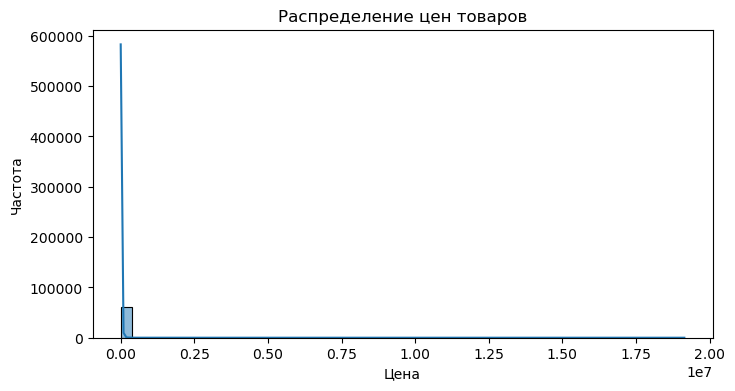

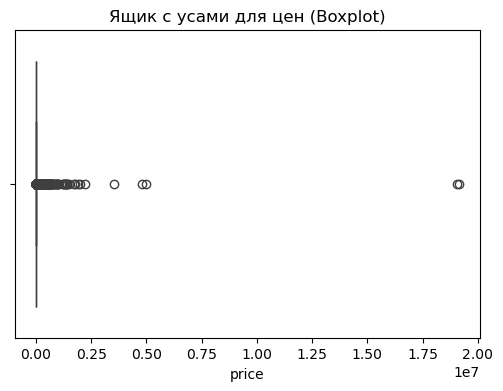

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Распределение цен товаров')
plt.xlabel('Цена')
plt.ylabel('Частота')

plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'])
plt.title('Ящик с усами для цен (Boxplot)')

In [4]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
upper_threshold = Q3 + 1.5 * IQR

outliers_df = df[df['price'] > upper_threshold].copy()
print(f"Найдено выбросов: {len(outliers_df)}")

Найдено выбросов: 8314


In [5]:
import matplotlib.pyplot as plt
from PIL import Image

def get_image_path(image_id):
    return f"aaa_advml_final_project_images/{image_id}.jpg"

def show_images_with_prices(dataframe, max_images=10):
    plt.figure(figsize=(15, 5))
    for i, (_, row) in enumerate(dataframe.head(max_images).iterrows()):
        img_path = get_image_path(row['image_id'])
        try:
            image = Image.open(img_path)
            plt.subplot(1, max_images, i + 1)
            plt.imshow(image)
            plt.title(f"{row['price']:.0f}₽")
            plt.axis('off')
        except Exception as e:
            print(f"Ошибка при загрузке {img_path}: {e}")
    plt.tight_layout()
    plt.show()

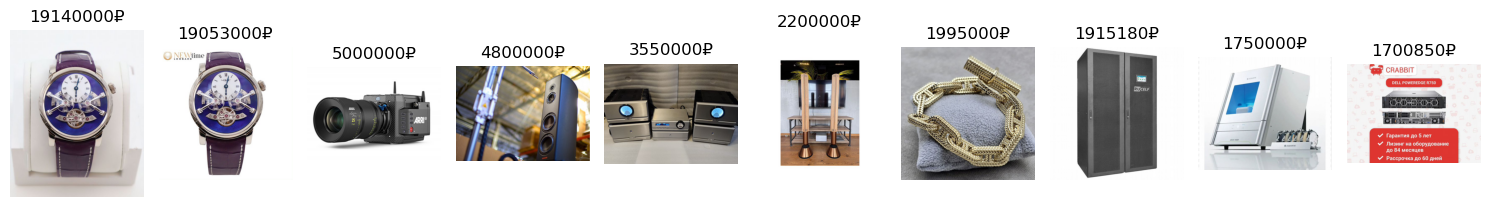

In [6]:
# Покажи 10 самых дорогих товаров (по выбросам)
show_images_with_prices(outliers_df.sort_values("price", ascending=False), max_images=10)

In [7]:
high_price_df = df[df['price'] > 1_000_000].copy()
print(f"Найдено товаров с ценой > 1 000 000 ₽: {len(high_price_df)}")

Найдено товаров с ценой > 1 000 000 ₽: 21


In [8]:
df = df[df['price'] <= 1_000_000]

In [9]:
import matplotlib.pyplot as plt
from PIL import Image

def get_image_path(image_id):
    return f"aaa_advml_final_project_images/{image_id}.jpg"

def show_images_with_prices(dataframe, max_images=20):
    plt.figure(figsize=(20, 5))
    for i, (_, row) in enumerate(dataframe.head(max_images).iterrows()):
        img_path = get_image_path(row['image_id'])
        try:
            image = Image.open(img_path)
            plt.subplot(1, max_images, i + 1)
            plt.imshow(image)
            plt.title(f"{row['price']:.0f}₽", fontsize=10)
            plt.axis('off')
        except Exception as e:
            print(f"❌ Ошибка: {img_path} — {e}")
    plt.tight_layout()
    plt.show()

# def show_images_with_prices(dataframe):
#     n = len(dataframe)
#     cols = 5
#     rows = (n // cols) + 1

#     plt.figure(figsize=(cols * 4, rows * 4))
#     for i, (_, row) in enumerate(dataframe.iterrows()):
#         img_path = get_image_path(row['image_id'])
#         try:
#             image = Image.open(img_path)
#             plt.subplot(rows, cols, i + 1)
#             plt.imshow(image)
#             plt.title(f"{row['price']:.0f}₽", fontsize=10)
#             plt.axis('off')
#         except Exception as e:
#             print(f"❌ Ошибка: {img_path} — {e}")
#     plt.tight_layout()
#     plt.show()

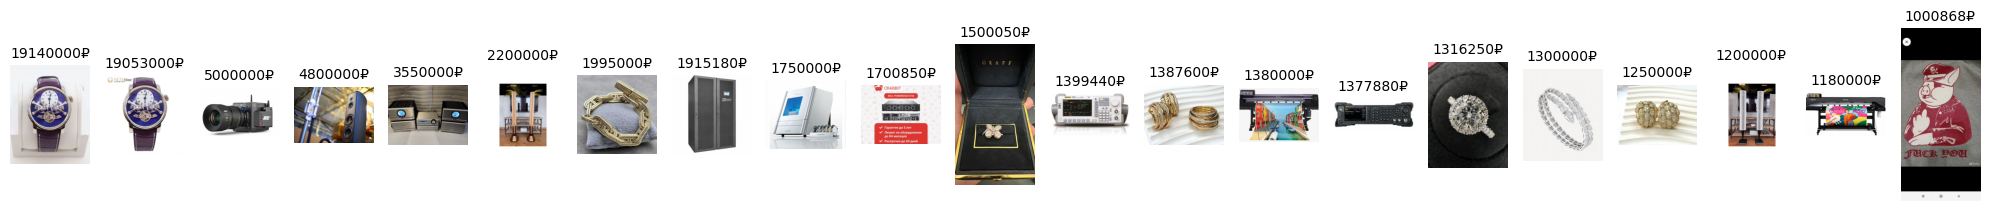

In [10]:
# Отрисуем 20 товаров с ценой > 1 млн
show_images_with_prices(high_price_df.sort_values("price", ascending=False), max_images=21)

subcategory_name
Товары для детей и игрушки      12287
Одежда, обувь, аксессуары       10599
Телефоны                         8183
Красота и здоровье               6942
Аудио и видео                    6177
Товары для компьютера            4386
Детская одежда и обувь           3459
Игры, приставки и программы      2063
Часы и украшения                 1792
Ноутбуки                         1474
Оргтехника и расходники          1241
Настольные компьютеры             958
Фототехника                       957
Планшеты и электронные книги      926
Name: count, dtype: int64


Text(0, 0.5, 'Категория')

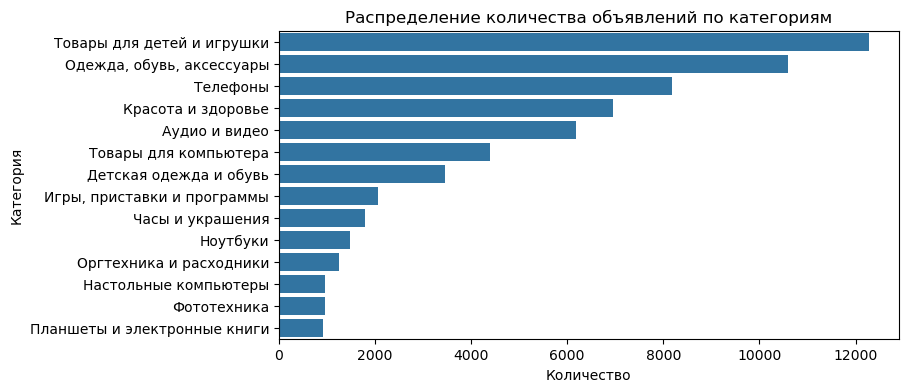

In [11]:
cat_counts = df['subcategory_name'].value_counts()
print(cat_counts)
plt.figure(figsize=(8,4))
sns.barplot(y=cat_counts.index, x=cat_counts.values)
plt.title('Распределение количества объявлений по категориям')
plt.xlabel('Количество')
plt.ylabel('Категория')

In [12]:
print(df.groupby('subcategory_name')['price'].mean().sort_values(ascending=False))

subcategory_name
Настольные компьютеры           43043.342380
Ноутбуки                        36494.489824
Часы и украшения                30985.970424
Телефоны                        22809.930221
Фототехника                     18650.084639
Планшеты и электронные книги    14472.427646
Аудио и видео                   11759.663915
Игры, приставки и программы      8506.996122
Товары для компьютера            8189.994072
Оргтехника и расходники          8049.007252
Товары для детей и игрушки       6170.118906
Красота и здоровье               4956.848171
Одежда, обувь, аксессуары        3482.494386
Детская одежда и обувь            899.936976
Name: price, dtype: float64


In [13]:
duplicates = df[df.duplicated()]
print(f"Число дублированных строк: {duplicates.shape[0]}")

Число дублированных строк: 0


In [14]:
# pip install torch torchvision

In [15]:
# pip uninstall clip -y

In [16]:
# pip install git+https://github.com/openai/CLIP.git

In [17]:
import torch
import clip
from PIL import Image

# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "mps" if torch.backends.mps.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)  # загружаем CLIP-модель

def get_image_embedding(path):
    image = preprocess(Image.open(path)).unsqueeze(0).to(device)
    with torch.no_grad():
        emb = model.encode_image(image)   # получаем эмбеддинг (1, 512)
    return emb.cpu().numpy().flatten()

# Пример получения эмбеддинга для одного изображения:
# emb = get_image_embedding(df.loc[0, 'image_path'])

In [18]:
def get_image_path(image_id):
    return f"aaa_advml_final_project_images/{image_id}.jpg"

In [19]:
image_path = get_image_path(df.loc[0, 'image_id'])
emb = get_image_embedding(image_path)
emb

array([-3.5889e-01,  7.8418e-01,  1.7044e-02,  5.3253e-02, -5.9479e-02,
        3.0655e-02, -8.7463e-02,  2.6123e-01,  1.0364e-01, -1.8372e-01,
        3.0908e-01, -5.9717e-01, -5.6445e-01,  1.7944e-01,  1.8066e-01,
       -3.1543e-01,  2.2388e-01, -3.7646e-01,  1.0687e-01, -5.6689e-01,
        1.0537e+00, -6.0852e-02,  2.1936e-01,  9.1370e-02, -2.7588e-01,
        3.2495e-01, -1.3306e-01, -1.4868e-01, -4.9976e-01, -4.2798e-01,
        2.5513e-02, -2.0520e-01, -4.6436e-01,  2.2446e-02, -8.9966e-02,
       -3.3154e-01, -9.1492e-02, -4.9854e-01, -6.8970e-02,  1.2197e+00,
       -5.4590e-01,  4.0698e-01, -3.0005e-01, -1.1877e-01,  1.8542e-01,
        8.1641e-01,  7.3340e-01,  1.6138e-01, -2.3389e-01,  6.6223e-02,
        2.5488e-01, -3.8086e-01, -7.4402e-02,  3.2910e-01,  7.5256e-02,
        3.0127e-01,  6.7017e-02,  1.5576e-01, -1.8079e-01,  1.7664e-01,
        1.0811e+00,  1.8274e-01, -6.6504e-01,  3.5083e-01, -6.4468e-03,
       -1.2842e-01, -6.8018e-01, -3.9868e-01, -8.5938e-02, -6.49

In [20]:
# print(torch.__version__)

In [21]:
# print("MPS доступен:", torch.backends.mps.is_available())
# print("MPS построен:", torch.backends.mps.is_built())

In [22]:
# device = "mps" if torch.backends.mps.is_available() else "cpu"

In [23]:
print("Модель на:", next(model.parameters()).device)

Модель на: mps:0


In [24]:
# image_embeddings = []
# failed_ids = []

# for idx, row in df.iterrows():
#     image_id = row['image_id']
#     img_path = get_image_path(image_id)

#     try:
#         emb = get_image_embedding(img_path)
#         image_embeddings.append(emb)
#     except Exception as e:
#         print(f"[Ошибка] {img_path}: {e}")
#         failed_ids.append(idx)

In [25]:
# import numpy as np
# import pickle

# # Сохраняем эмбеддинги
# image_embeddings_array = np.array(image_embeddings)  # Преобразуем список в массив
# np.save("image_embeddings.npy", image_embeddings_array)

# # Сохраняем индексы с ошибками
# with open("failed_ids.pkl", "wb") as f:
#     pickle.dump(failed_ids, f)

In [26]:
import numpy as np
import pickle

# Загрузка эмбеддингов
image_embeddings = np.load("image_embeddings.npy")

# Загрузка индексов с ошибками
with open("failed_ids.pkl", "rb") as f:
    failed_ids = pickle.load(f)

In [27]:
# image_embeddings[:2]

In [28]:
# Преобразуем в numpy-массив
# image_embeddings = np.array(image_embeddings)

In [29]:
image_embeddings[:2]

array([[-0.359  ,  0.784  ,  0.01704, ..., -0.2673 ,  0.2776 , -0.2051 ],
       [-0.7495 ,  0.1589 ,  0.0893 , ...,  0.4883 , -0.01671,  0.0549 ]],
      dtype=float16)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Предполагаем, что собрали эмбеддинги всех изображений в массив image_embeddings
X_train, X_test, y_train, y_test = train_test_split(image_embeddings, df['price'], test_size=0.2, random_state=42)

# Стандартизация признаков (опционально):
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# kNN-регрессор: предсказывает среднее цены k ближайших соседей:contentReference[oaicite:5]{index=5}
knn = KNeighborsRegressor(n_neighbors=5, metric="cosine")
knn.fit(X_train, y_train)
y_pred_knn = np.maximum(knn.predict(X_test), 100)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def mdape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.median(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

mse = mean_squared_error(y_test, y_pred_knn)
mae = mean_absolute_error(y_test, y_pred_knn)
print(f"KNN-регрессор: MSE={mse:.2f}, MAE={mae:.2f}")
print(f"MAPE: {mape(y_test, y_pred_knn):.2f}%")
print(f"MdAPE: {mdape(y_test, y_pred_knn):.2f}%")

KNN-регрессор: MSE=591766593.85, MAE=7255.19
MAPE: 23098.59%
MdAPE: 62.49%


In [32]:
# Альтернативный простой бейзлайн - средняя по категории

In [33]:
# Разбиваем эмбеддинги и категории отдельно
X_emb_train, X_emb_test, y_price_train, y_price_test, cat_train, cat_test = train_test_split(
    image_embeddings, df['price'], df['category_name'],
    test_size=0.2, random_state=42
)

# Группируем по категориям, считаем среднюю цену
cat_price_mean = df.groupby('category_name')['price'].mean()

# Функция предсказания по категории
def predict_from_category(cat):
    return cat_price_mean.get(cat, df['price'].mean())  # если категория неизвестна — берём среднюю по всем

# Предсказания
y_pred_category_baseline = cat_test.apply(predict_from_category)
y_pred_category_baseline = np.maximum(y_pred_category_baseline, 100)

In [34]:
from sklearn.linear_model import LinearRegression

# One-hot-кодируем категорию
X_ohe = pd.get_dummies(df[['category_name']], drop_first=True)

# Делим на train/test с уникальными именами
X_ohe_train, X_ohe_test, y_price_ohe_train, y_price_ohe_test = train_test_split(
    X_ohe, df['price'], test_size=0.2, random_state=42
)

# Обучение модели
linreg_ohe = LinearRegression()
linreg_ohe.fit(X_ohe_train, y_price_ohe_train)

# Предсказание
y_pred_ohe = linreg_ohe.predict(X_ohe_test)
y_pred_ohe = np.maximum(y_pred_ohe, 100)

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def mdape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.median(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Оценка
mae_ohe = mean_absolute_error(y_price_ohe_test, y_pred_ohe)
mse_ohe = mean_squared_error(y_price_ohe_test, y_pred_ohe)

print(f"One-hot лин. регрессия: MAE = {mae_ohe:.2f}, MSE = {mse_ohe:.2f}")
print(f"MAPE: {mape(y_price_ohe_test, y_pred_ohe):.2f}%")
print(f"MdAPE: {mdape(y_price_ohe_test, y_pred_ohe):.2f}%")

One-hot лин. регрессия: MAE = 12679.65, MSE = 965857984.24
MAPE: 22409.26%
MdAPE: 354.99%


In [35]:
# Faiss по подкатегориям

In [36]:
# словарь: image_id -> эмбеддинг
image_embeddings_dict = {row.image_id: emb for row, emb in zip(df.itertuples(), image_embeddings)}

# словарь: image_id -> subcategory_name
image_subcat_dict = df.set_index('image_id')['subcategory_name'].to_dict()

# словарь: image_id -> price
image_price_dict = df.set_index('image_id')['price'].to_dict()

In [37]:
all_ids = list(image_embeddings_dict.keys())
X_all = np.array([image_embeddings_dict[i] for i in all_ids])
y_all = np.array([image_price_dict[i] for i in all_ids])

ids_train, ids_test = train_test_split(all_ids, test_size=0.2, random_state=42)

In [38]:
subcat_embeddings_train = {}
subcat_prices_train = {}

for i in ids_train:
    subcat = image_subcat_dict[i]
    emb = image_embeddings_dict[i]
    price = image_price_dict[i]
    subcat_embeddings_train.setdefault(subcat, []).append(emb)
    subcat_prices_train.setdefault(subcat, []).append(price)

subcat_centroids = {
    cat: np.mean(np.stack(embs), axis=0)
    for cat, embs in subcat_embeddings_train.items()
}

In [39]:
from sklearn.metrics.pairwise import cosine_distances

In [40]:
# pip install faiss-cpu

In [41]:
# print("hello")

In [42]:
import faiss
import numpy as np
from sklearn.metrics.pairwise import cosine_distances

# Строим индексы FAISS по каждой подкатегории
faiss_indexes = {}
subcat_id_to_y = {}
subcat_id_to_ids = {}

for subcat, embeddings in subcat_embeddings_train.items():
    X = np.stack(embeddings).astype('float32')

    # Нормируем вектора
    faiss.normalize_L2(X)

    index = faiss.IndexFlatIP(X.shape[1])  # "Inner Product" + normalized = cosine similarity
    index.add(X)

    faiss_indexes[subcat] = index
    subcat_id_to_y[subcat] = np.array(subcat_prices_train[subcat])
    subcat_id_to_ids[subcat] = list(range(len(embeddings)))

In [43]:
# Предсказание
y_true, y_pred = [], []

for i in ids_test:
    true_price = image_price_dict[i]
    emb = image_embeddings_dict[i].astype('float32').reshape(1, -1)

    # определяем подкатегорию
    centroid_matrix = np.stack(list(subcat_centroids.values()))
    distances = cosine_distances([emb.flatten()], centroid_matrix)[0]
    closest_subcat = list(subcat_centroids.keys())[np.argmin(distances)]

    # нормируем и ищем в FAISS
    faiss.normalize_L2(emb)
    index = faiss_indexes[closest_subcat]
    D, I = index.search(emb, k=5)

    # средняя цена
    prices = subcat_id_to_y[closest_subcat][I[0]]
    pred_price = np.mean(prices)
    pred_price = max(pred_price, 100)  # не ниже 100

    y_true.append(true_price)
    y_pred.append(pred_price)

In [44]:
# Метрики
from sklearn.metrics import mean_squared_error, mean_absolute_error

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def mdape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.median(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

print(f"MAE:  {mean_absolute_error(y_true, y_pred):.2f}")
print(f"MSE:  {mean_squared_error(y_true, y_pred):.2f}")
print(f"MAPE: {mape(y_true, y_pred):.2f}%")
print(f"MdAPE: {mdape(y_true, y_pred):.2f}%")

MAE:  8490.93
MSE:  775995088.36
MAPE: 31684.73%
MdAPE: 69.40%


In [45]:
# Vision Transformer (ViT)

In [46]:
import torch
import torch.nn as nn

class EmbeddingTransformer(nn.Module):
    def __init__(self, embedding_dim=512, num_classes=1,
                 num_layers=2, d_model=64, nhead=4, dim_feedforward=128, dropout=0.1):
        super().__init__()
        self.num_tokens = 32
        self.token_dim = embedding_dim // self.num_tokens
        self.cls_token = nn.Parameter(torch.randn(1, 1, d_model))
        self.pos_embedding = nn.Parameter(torch.randn(1, 1 + self.num_tokens, d_model))
        self.input_proj = nn.Linear(self.token_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, nhead=nhead,
            dim_feedforward=dim_feedforward, dropout=dropout
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.regressor = nn.Sequential(
            nn.LayerNorm(d_model),
            nn.Linear(d_model, num_classes)
        )

    def forward(self, emb):
        B = emb.size(0)
        x = emb.view(B, self.num_tokens, self.token_dim)
        x = self.input_proj(x)
        cls_tokens = self.cls_token.expand(B, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)
        x = x + self.pos_embedding
        x = self.transformer(x)
        out = self.regressor(x[:, 0, :])
        return out.squeeze(-1)

In [47]:
# import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Гиперпараметры
BATCH_SIZE = 64
EPOCHS = 10
LR = 1e-3
DEVICE = "mps" if torch.backends.mps.is_available() else "cpu"

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    image_embeddings, df['price'].values, test_size=0.2, random_state=42
)

# Преобразование в тензоры
X_train_t = torch.tensor(X_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

# DataLoader'ы
train_ds = TensorDataset(X_train_t, y_train_t)
test_ds = TensorDataset(X_test_t, y_test_t)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE)


In [48]:
model = EmbeddingTransformer().to(DEVICE)
# model = EmbeddingTransformer(d_model=128, num_layers=4).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
loss_fn = torch.nn.L1Loss()  # MAE
# loss_fn = torch.nn.MSELoss()

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        pred = model(xb)
        pred = torch.maximum(pred, torch.tensor(100.0, device=DEVICE))  # min 100
        loss = loss_fn(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{EPOCHS} - Loss: {total_loss/len(train_loader):.2f}")


/opt/anaconda3/lib/python3.12/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/10 - Loss: 10594.90
Epoch 2/10 - Loss: 10535.79
Epoch 3/10 - Loss: 10559.52
Epoch 4/10 - Loss: 10531.76
Epoch 5/10 - Loss: 10533.41
Epoch 6/10 - Loss: 10545.46
Epoch 7/10 - Loss: 10533.08
Epoch 8/10 - Loss: 10536.33
Epoch 9/10 - Loss: 10534.12
Epoch 10/10 - Loss: 10532.05


In [49]:
model.eval()
with torch.no_grad():
    y_preds, y_trues = [], []
    for xb, yb in test_loader:
        xb = xb.to(DEVICE)
        pred = model(xb).cpu().numpy()
        pred = np.maximum(pred, 100)  # не ниже 100
        y_preds.extend(pred)
        y_trues.extend(yb.numpy())

y_preds = np.array(y_preds)
y_preds = np.maximum(y_preds, 100) 

y_trues = np.array(y_trues)


In [50]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def mdape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.median(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

print(f"MAE: {mean_absolute_error(y_trues, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_trues, y_preds):.2f}")
print(f"MAPE: {mape(y_trues, y_preds):.2f}%")
print(f"MdAPE: {mdape(y_trues, y_preds):.2f}%")


MAE: 10668.06
MSE: 1113052160.00
MAPE: 384.02%
MdAPE: 96.00%


In [51]:
# регрессия

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

X = image_embeddings.astype(np.float32)

y = df['price'].values 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lr = np.maximum(linreg.predict(X_test), 100)

# Метрики
def mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def mdape(y_true, y_pred):
    mask = y_true != 0
    return np.median(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

print("🔷 Linear Regression:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"MAPE: {mape(y_test, y_pred_lr):.2f}%")
print(f"MdAPE: {mdape(y_test, y_pred_lr):.2f}%")


🔷 Linear Regression:
MAE: 10620.14
MSE: 770409577.34
MAPE: 46940.78%
MdAPE: 98.00%


In [53]:
# catboost

In [54]:
from catboost import CatBoostRegressor

X_train, X_test, y_train, y_test = train_test_split(
    image_embeddings, y, test_size=0.2, random_state=42
)

catboost_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='MAE',
    verbose=False
)
catboost_model.fit(X_train, y_train)
y_pred_cb = np.maximum(catboost_model.predict(X_test), 100)

print("🔷 CatBoost Regressor:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_cb):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_cb):.2f}")
print(f"MAPE: {mape(y_test, y_pred_cb):.2f}%")
print(f"MdAPE: {mdape(y_test, y_pred_cb):.2f}%")


🔷 CatBoost Regressor:
MAE: 7691.60
MSE: 873130881.43
MAPE: 5354.47%
MdAPE: 70.41%
